Import các thư viện cần thiết cho chương trình nhận dạng chữ viết bằng tay

In [3]:
import numpy as np # Library for Algebra
from mnist import MNIST # Load database of handwritten digits http://yann.lecun.com/exdb/mnist/
import matplotlib.pyplot as plt # Show image
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
from display_network import *

Hàm display_network.py đi kèm dùng để hiển thị nhiều bức ảnh các chữ số cùng một lúc.

Tải dữ liệu gồm toàn bộ 10k chữ số của MNIST

In [25]:
mndata = MNIST('/home/babameme/Desktop/MachineLearning/HandRecognition/MNIST')
mndata.load_testing()
X0 = mndata.test_images # Return a list, every elements is a list of pixel of a picture (784 element)
#X = np.asarray(X0)[:1000,:] / 256.0 # Normalize data from [0,256] to [0,1]
X = np.asarray(X0) / 256.0
print type(X), len(X)
print type(X[0]), len(X[0])

<type 'numpy.ndarray'> 10000
<type 'numpy.ndarray'> 784


Thực hiện thuật toán K-means clustering trên toàn bộ 10k chữ số.

In [27]:
K = 10
kmeans = KMeans(n_clusters=K).fit(X)
pred_label = kmeans.predict(X)
print type(pred_label)
print pred_label.shape

<type 'numpy.ndarray'>
(10000,)


Hiển thị kết qủa

<type 'numpy.ndarray'>
(10, 784)
<type 'numpy.ndarray'>
(291, 30)


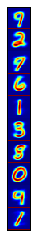

In [28]:
print(type(kmeans.cluster_centers_))
print(kmeans.cluster_centers_.shape)
A = display_network(kmeans.cluster_centers_.T,K,1)
print(type(A))
print(A.shape)
f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()
#plt.savefig('a1.png', bbox_inches='tight') # Command don't affect
import scipy.misc
scipy.misc.imsave('a1.png',A)

# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())
# map the normalized data to colors
# image is now RGBA (512x512x4) 
image = cmap(norm(A))

scipy.misc.imsave('aa.png', image)

Chọn một vài ảnh từ mỗi Cluster

In [37]:
N0 = 20
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    Xk = X[pred_label == k, :]
    #print Xk.shape
    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(N0).fit(Xk)
    dist, nearest_id  = neigh.kneighbors(center_k, N0)
    #print type(dist), dist.shape
    #print type(nearest_id), nearest_id.shape
    
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]

In ra 20 điểm bất kì (20 điểm đầu tiên trong danh sách)

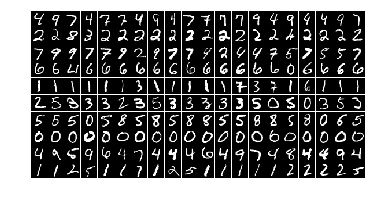

In [38]:
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()

In ra 20 điểm gần với center nhất

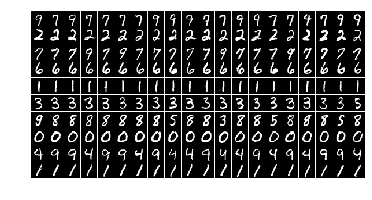

In [44]:
plt.axis('off')
B = display_network(X1.T, K, N0)
f3 = plt.imshow(B, interpolation='nearest' )
plt.gray()
plt.show()
scipy.misc.imsave('cc.png', B)